In [1]:
import numba
from numba import njit
import functions_new_jit as func
import importlib
importlib.reload(func)

##########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

"simulate_riot_sectors" function test

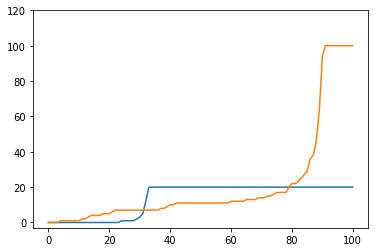

In [7]:
N = 120
average = 45
deviation = 12

agents = func.create_agents(N,average,deviation)
sector0_size = 20
sector1_size = 100

system = func.System(agents, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors(system, steps)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors" heatmaps

In [8]:
@njit(parallel=True)
def zas(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors(system, steps)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


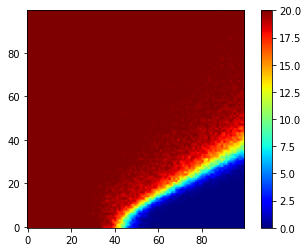

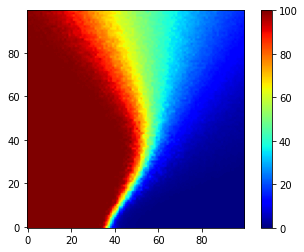

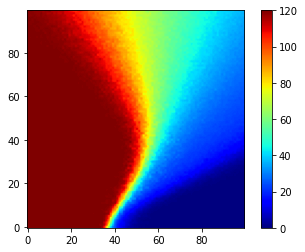

In [9]:
h0, h1, h2 = zas(3)

f1 = open("simulate_riot_sectors_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_exit" function test

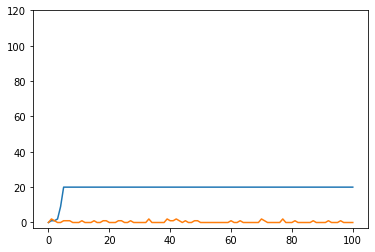

In [13]:
N = 120
average = 45
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_exit(system, steps)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_exit" heatmaps

In [14]:
@njit(parallel=True)
def zas2(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_exit(system, steps)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

In [16]:
h0, h1, h2 = zas2(3)

f1 = open("simulate_riot_sectors_exit_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_exit_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_exit_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


NameError: name 'heat_map_sectors_exit_0' is not defined

<Figure size 432x288 with 0 Axes>

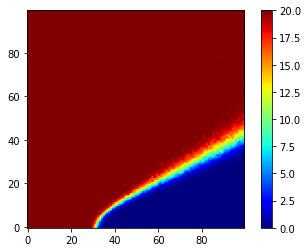

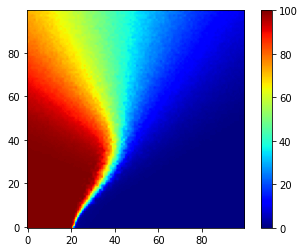

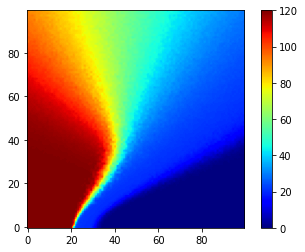

In [49]:
f1 = open("simulate_riot_sectors_exit_0_difsizes.txt", "r")
f2 = open("simulate_riot_sectors_exit_1_difsizes.txt", "r")
f3 = open("simulate_riot_sectors_exit_total_difsizes.txt", "r")

h0 = np.zeros((100,100))
h1 = np.zeros((100,100))
h2 = np.zeros((100,100))

for _ in range(10000):
    line = f1.readline()
    line = line.split()
    h0[int(line[0])][int(line[1])] = float(line[2])
    line = f2.readline()
    line = line.split()
    h1[int(line[0])][int(line[1])] = float(line[2])
    line = f3.readline()
    line = line.split()
    h2[int(line[0])][int(line[1])] = float(line[2])

f1.close()
f2.close()
f3.close()
    
plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show() 

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show() 

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show() 

"simulate_riot_sectors_migration" function test (migration_probability = 0.01)

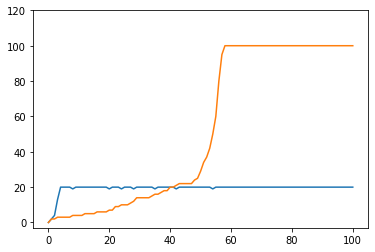

In [2]:
N = 120
average = 45
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration(system, steps, 0.01)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration" heatmaps

In [51]:
@njit(parallel=True)
def zas3(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration(system, steps, 0.01)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


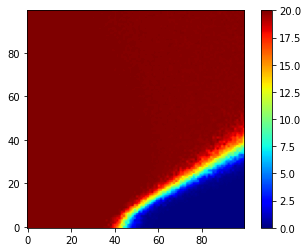

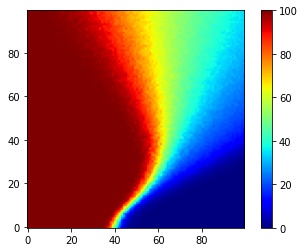

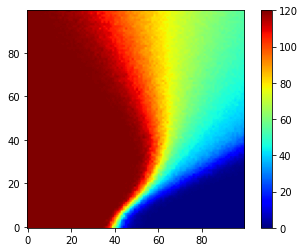

In [53]:
h0, h1, h2 = zas3(3)

f1 = open("simulate_riot_sectors_migration_001_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_001_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_001_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration" function test (migration_probability = 0.5)

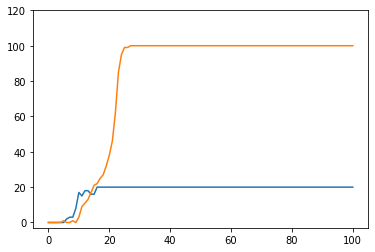

In [3]:
N = 120
average = 45
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration(system, steps, 0.5)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

In [55]:
@njit(parallel=True)
def zas3_2(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration(system, steps, 0.5)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


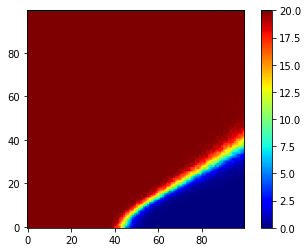

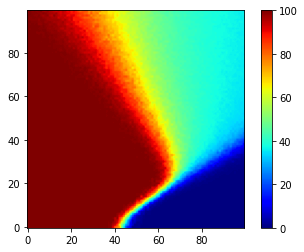

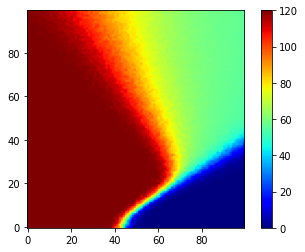

In [57]:
h0, h1, h2 = zas3_2(3)

f1 = open("simulate_riot_sectors_migration_05_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_05_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_05_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration_exit" function test (migration_probability = 0.01)

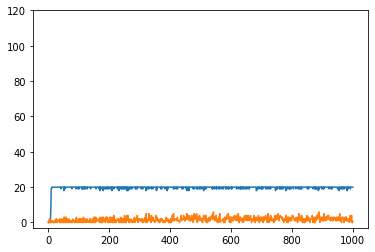

In [4]:
N = 120
average = 45
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.01

progression = func.simulate_riot_sectors_migration_exit(system, steps, 0.01)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration_exit" heatmaps

In [58]:
@njit(parallel=True)
def zas4(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration_exit(system, steps, 0.01)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


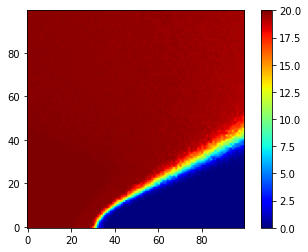

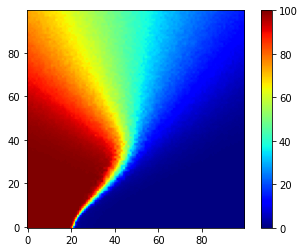

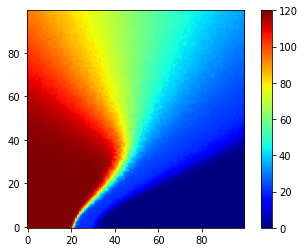

In [60]:
h0, h1, h2 = zas4(3)

f1 = open("simulate_riot_sectors_migration_exit_001_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_exit_001_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_exit_001_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration_exit" function test (migration_probability = 0.5)

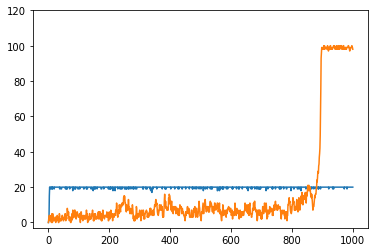

In [3]:
N = 120
average = 45
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.01

progression = func.simulate_riot_sectors_migration_exit(system, steps,migration_probability,0.5)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

In [4]:
@njit(parallel=True)
def zas4_2(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration_exit(system, steps, 0.5)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


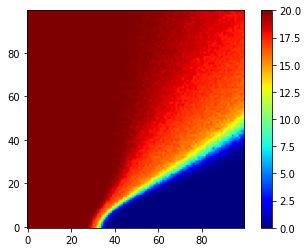

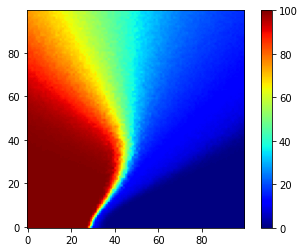

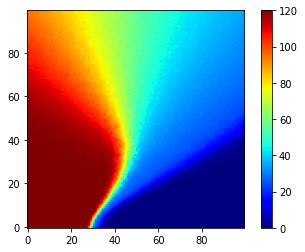

In [6]:
h0, h1, h2 = zas4_2(3)

f1 = open("simulate_riot_sectors_migration_exit_05_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_exit_05_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_exit_05_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration_gregarious" function test

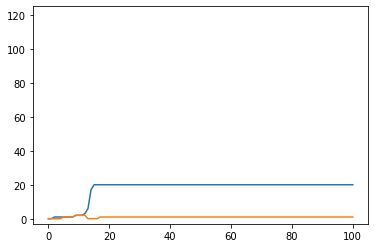

In [7]:
import time
N = 120
average = 55
deviaition = 20

sector0_size = 20
sector1_size = 100

agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration_gregarious(system, steps)


et = time.time()

# get the execution time

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_gregarious" heatmaps

In [8]:
@njit(parallel=True)
def zas5(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration_gregarious(system, steps)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


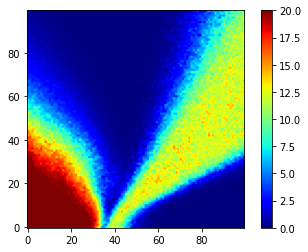

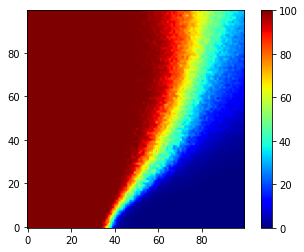

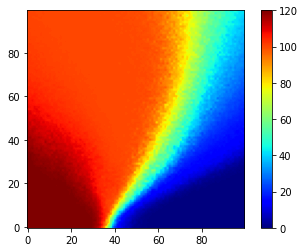

In [9]:
h0, h1, h2 = zas5(3)

f1 = open("simulate_riot_sectors_migration_gregarious_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_gregarious_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_gregarious_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" function test

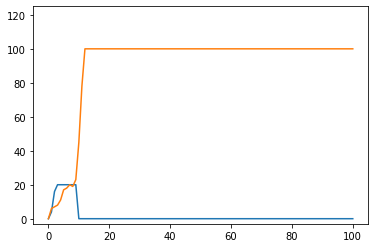

In [12]:
N = 120
average = 35
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" heatmaps

In [11]:
@njit(parallel=True)
def zas6(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


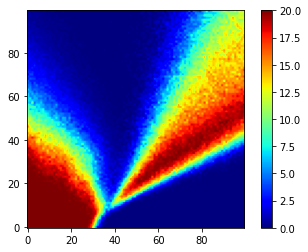

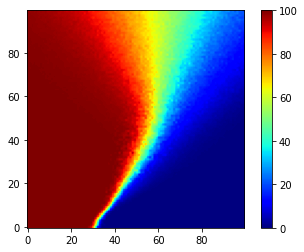

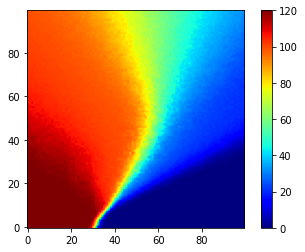

In [13]:
h0, h1, h2 = zas6(3)


f1 = open("simulate_riot_sectors_migration_gregarious_exit_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_gregarious_exit_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_gregarious_exit_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration_exit_unidirectional" function test (migration_probability = 0.01)

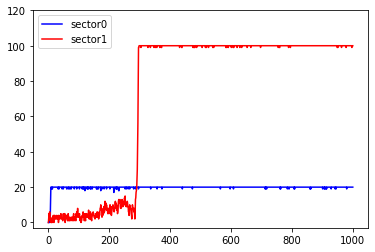

In [14]:
N = 120
average = 40
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.01

progression = func.simulate_riot_sectors_migration_exit_unidirectional(system, steps, 0.01)


plt.figure()
plt.plot(progression[0], color='b', label='sector0')
plt.plot(progression[1], color='r', label='sector1')
plt.ylim(-3,N)
plt.legend()
plt.show()

In [15]:
@njit(parallel=True)
def zas8(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration_exit_unidirectional(system, steps, 0.01)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


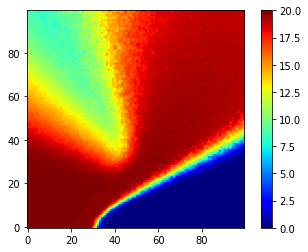

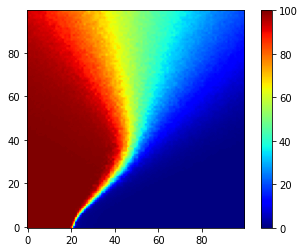

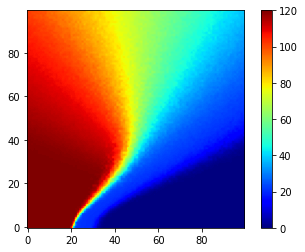

In [16]:
h0, h1, h2 = zas8(3)

f1 = open("simulate_riot_sectors_migration_unidirectional_exit_001_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_unidirectional_exit_001_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_unidirectional_exit_001_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

"simulate_riot_sectors_migration_exit_unidirectional" function test (migration_probability = 0.5)

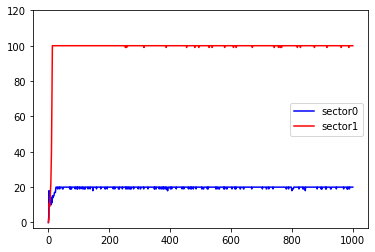

In [17]:
N = 120
average = 37
deviaition = 20

sector0_size = 20
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.5

progression = func.simulate_riot_sectors_migration_exit_unidirectional(system, steps, 0.5)


plt.figure()
plt.plot(progression[0], color='b', label='sector0')
plt.plot(progression[1], color='r', label='sector1')
plt.ylim(-3,N)
plt.legend()
plt.show()

In [18]:
@njit(parallel=True)
def zas9(a):
    N = 120
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 20
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_1 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))

    for k in numba.prange(len(averages_sample)):
        print(k)
        average = averages_sample[k]
        a += 1
        if a == 2:
            break
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size_0 = 0
            average_size_1 = 0
            average_size_total = 0

            for j in numba.prange(simulations):   # riot simulation
                agents = func.create_agents(N,average,deviation)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors_migration_exit_unidirectional(system, steps, 0.5)
                average_size_0 += final[0][-1]
                average_size_1 += final[1][-1]
                average_size_total += final[0][-1] + final[1][-1]

            average_size_0 = average_size_0/simulations
            average_size_1 = average_size_1/simulations
            average_size_total = average_size_total/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_1[i][k] = average_size_1
            heat_map_total[i][k] = average_size_total

    return heat_map_0, heat_map_1, heat_map_total

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


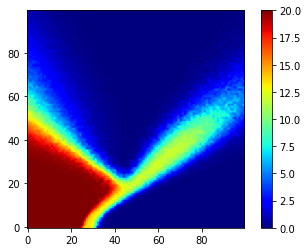

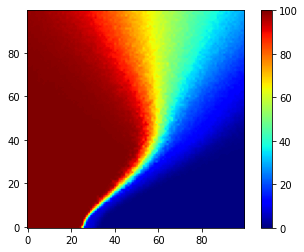

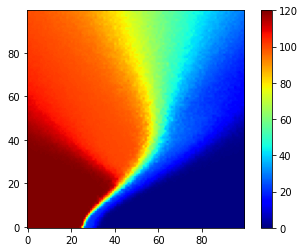

In [19]:
h0, h1, h2 = zas9(3)

f1 = open("simulate_riot_sectors_migration_unidirectional_exit_05_0_difsizes.txt", "w")
f2 = open("simulate_riot_sectors_migration_unidirectional_exit_05_1_difsizes.txt", "w")
f3 = open("simulate_riot_sectors_migration_unidirectional_exit_05_total_difsizes.txt", "w")

for i in range(100):
    for j in range(100):
        f1.write(str(i) + " " + str(j) + " " + str(h0[i][j]) + "\n")
        f2.write(str(i) + " " + str(j) + " " + str(h1[i][j]) + "\n")
        f3.write(str(i) + " " + str(j) + " " + str(h2[i][j]) + "\n")
f1.close()
f2.close()
f3.close()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.colorbar()
plt.show()